## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              913.1
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                   2.12e-317
Time:                        15:47:27   Log-Likelihood:                         -118.39
No. Observations:                 614   AIC:                                      250.8
Df Residuals:                     607   BIC:                                      281.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

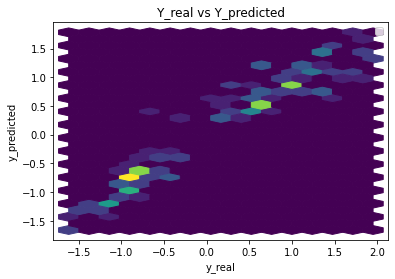

Performance Metrics
Mean Squared Error: 0.07577780655056585
Mean Absolute Error: 0.1959971527234286
Manhattan distance: 30.183561519408016
Euclidean distance: 3.416106293543445


Stats Model MAE 0.1959971527234286


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906


0:	learn: 0.9666911	total: 68ms	remaining: 1m 7s
1:	learn: 0.9345107	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9073720	total: 73.6ms	remaining: 24.5s
3:	learn: 0.8766710	total: 76.2ms	remaining: 19s
4:	learn: 0.8521091	total: 77.1ms	remaining: 15.3s
5:	learn: 0.8243773	total: 77.7ms	remaining: 12.9s
6:	learn: 0.8020875	total: 78.5ms	remaining: 11.1s
7:	learn: 0.7771334	total: 81.1ms	remaining: 10.1s
8:	learn: 0.7515943	total: 84.4ms	remaining: 9.29s
9:	learn: 0.7280054	total: 85.4ms	remaining: 8.46s
10:	learn: 0.7051524	total: 85.9ms	remaining: 7.73s
11:	learn: 0.6822830	total: 88.5ms	remaining: 7.28s
12:	learn: 0.6624672	total: 89.4ms	remaining: 6.78s
13:	learn: 0.6418288	total: 90.3ms	remaining: 6.36s
14:	learn: 0.6219553	total: 91.1ms	remaining: 5.99s
15:	learn: 0.6017003	total: 92.3ms	remaining: 5.67s
16:	learn: 0.5844191	total: 92.9ms	remaining: 5.37s
17:	learn: 0.5684995	total: 93.5ms	remaining: 5.1s
18:	learn: 0.5507151	total: 94.4ms	remaining: 4.87s
19:	learn: 0.5349215	total:

27:	learn: 0.4195636	total: 108ms	remaining: 3.74s
28:	learn: 0.4075192	total: 109ms	remaining: 3.65s
29:	learn: 0.3959128	total: 111ms	remaining: 3.6s
30:	learn: 0.3840883	total: 113ms	remaining: 3.54s
31:	learn: 0.3728548	total: 115ms	remaining: 3.47s
32:	learn: 0.3619353	total: 116ms	remaining: 3.4s
33:	learn: 0.3521156	total: 116ms	remaining: 3.31s
34:	learn: 0.3425687	total: 118ms	remaining: 3.25s
35:	learn: 0.3321309	total: 120ms	remaining: 3.2s
36:	learn: 0.3222708	total: 124ms	remaining: 3.22s
37:	learn: 0.3141161	total: 124ms	remaining: 3.14s
38:	learn: 0.3046119	total: 125ms	remaining: 3.09s
39:	learn: 0.2973793	total: 126ms	remaining: 3.02s
40:	learn: 0.2884202	total: 131ms	remaining: 3.05s
41:	learn: 0.2809711	total: 133ms	remaining: 3.03s
42:	learn: 0.2735855	total: 135ms	remaining: 3s
43:	learn: 0.2666452	total: 137ms	remaining: 2.97s
44:	learn: 0.2610089	total: 142ms	remaining: 3s
45:	learn: 0.2552743	total: 143ms	remaining: 2.97s
46:	learn: 0.2493215	total: 144ms	remain

54:	learn: 0.2014893	total: 157ms	remaining: 2.69s
55:	learn: 0.1967041	total: 158ms	remaining: 2.66s
56:	learn: 0.1920959	total: 159ms	remaining: 2.63s
57:	learn: 0.1870492	total: 159ms	remaining: 2.58s
58:	learn: 0.1820677	total: 159ms	remaining: 2.54s
59:	learn: 0.1778606	total: 161ms	remaining: 2.52s
60:	learn: 0.1743336	total: 162ms	remaining: 2.49s
61:	learn: 0.1698413	total: 163ms	remaining: 2.46s
62:	learn: 0.1660265	total: 163ms	remaining: 2.43s
63:	learn: 0.1616597	total: 164ms	remaining: 2.4s
64:	learn: 0.1585720	total: 165ms	remaining: 2.37s
65:	learn: 0.1547959	total: 166ms	remaining: 2.35s
66:	learn: 0.1507392	total: 167ms	remaining: 2.33s
67:	learn: 0.1477704	total: 167ms	remaining: 2.29s
68:	learn: 0.1444585	total: 168ms	remaining: 2.26s
69:	learn: 0.1413849	total: 169ms	remaining: 2.24s
70:	learn: 0.1394239	total: 169ms	remaining: 2.21s
71:	learn: 0.1369323	total: 170ms	remaining: 2.19s
72:	learn: 0.1340218	total: 170ms	remaining: 2.16s
73:	learn: 0.1311920	total: 171m

91:	learn: 0.0940239	total: 194ms	remaining: 1.91s
92:	learn: 0.0921004	total: 199ms	remaining: 1.94s
93:	learn: 0.0903684	total: 201ms	remaining: 1.94s
94:	learn: 0.0887922	total: 202ms	remaining: 1.92s
95:	learn: 0.0875992	total: 203ms	remaining: 1.91s
96:	learn: 0.0868049	total: 203ms	remaining: 1.89s
97:	learn: 0.0853609	total: 204ms	remaining: 1.88s
98:	learn: 0.0839102	total: 204ms	remaining: 1.86s
99:	learn: 0.0828153	total: 205ms	remaining: 1.84s
100:	learn: 0.0812621	total: 205ms	remaining: 1.83s
101:	learn: 0.0798107	total: 206ms	remaining: 1.81s
102:	learn: 0.0786451	total: 209ms	remaining: 1.82s
103:	learn: 0.0772107	total: 209ms	remaining: 1.8s
104:	learn: 0.0764886	total: 210ms	remaining: 1.79s
105:	learn: 0.0755316	total: 211ms	remaining: 1.77s
106:	learn: 0.0745433	total: 211ms	remaining: 1.76s
107:	learn: 0.0734918	total: 212ms	remaining: 1.75s
108:	learn: 0.0723288	total: 212ms	remaining: 1.74s
109:	learn: 0.0715022	total: 213ms	remaining: 1.72s
110:	learn: 0.0704712	

122:	learn: 0.0611301	total: 229ms	remaining: 1.63s
123:	learn: 0.0606484	total: 230ms	remaining: 1.62s
124:	learn: 0.0602310	total: 234ms	remaining: 1.64s
125:	learn: 0.0596046	total: 234ms	remaining: 1.63s


126:	learn: 0.0591354	total: 264ms	remaining: 1.81s
127:	learn: 0.0588395	total: 266ms	remaining: 1.81s
128:	learn: 0.0584555	total: 269ms	remaining: 1.82s
129:	learn: 0.0579151	total: 270ms	remaining: 1.8s
130:	learn: 0.0574935	total: 271ms	remaining: 1.8s
131:	learn: 0.0570436	total: 274ms	remaining: 1.8s
132:	learn: 0.0565679	total: 277ms	remaining: 1.81s
133:	learn: 0.0562570	total: 278ms	remaining: 1.79s
134:	learn: 0.0558833	total: 278ms	remaining: 1.78s
135:	learn: 0.0555432	total: 280ms	remaining: 1.78s
136:	learn: 0.0552827	total: 281ms	remaining: 1.77s
137:	learn: 0.0549297	total: 283ms	remaining: 1.76s
138:	learn: 0.0544841	total: 285ms	remaining: 1.76s
139:	learn: 0.0540809	total: 286ms	remaining: 1.76s
140:	learn: 0.0537480	total: 288ms	remaining: 1.75s
141:	learn: 0.0534296	total: 288ms	remaining: 1.74s
142:	learn: 0.0529918	total: 290ms	remaining: 1.74s
143:	learn: 0.0526583	total: 290ms	remaining: 1.73s
144:	learn: 0.0524008	total: 292ms	remaining: 1.72s
145:	learn: 0.0

159:	learn: 0.0487726	total: 325ms	remaining: 1.71s
160:	learn: 0.0485271	total: 329ms	remaining: 1.71s
161:	learn: 0.0483478	total: 333ms	remaining: 1.72s
162:	learn: 0.0481274	total: 337ms	remaining: 1.73s
163:	learn: 0.0479055	total: 338ms	remaining: 1.72s
164:	learn: 0.0476479	total: 338ms	remaining: 1.71s
165:	learn: 0.0474851	total: 339ms	remaining: 1.7s
166:	learn: 0.0473252	total: 340ms	remaining: 1.69s
167:	learn: 0.0470484	total: 341ms	remaining: 1.69s
168:	learn: 0.0468477	total: 343ms	remaining: 1.69s
169:	learn: 0.0466596	total: 345ms	remaining: 1.69s
170:	learn: 0.0464774	total: 346ms	remaining: 1.68s
171:	learn: 0.0462769	total: 347ms	remaining: 1.67s
172:	learn: 0.0460831	total: 349ms	remaining: 1.67s
173:	learn: 0.0459260	total: 350ms	remaining: 1.66s
174:	learn: 0.0457791	total: 351ms	remaining: 1.65s
175:	learn: 0.0456714	total: 354ms	remaining: 1.66s
176:	learn: 0.0455142	total: 355ms	remaining: 1.65s
177:	learn: 0.0453283	total: 356ms	remaining: 1.64s
178:	learn: 0

206:	learn: 0.0410286	total: 394ms	remaining: 1.51s
207:	learn: 0.0408844	total: 395ms	remaining: 1.5s
208:	learn: 0.0407268	total: 396ms	remaining: 1.5s
209:	learn: 0.0406575	total: 397ms	remaining: 1.49s
210:	learn: 0.0405499	total: 397ms	remaining: 1.49s
211:	learn: 0.0402904	total: 402ms	remaining: 1.49s
212:	learn: 0.0402234	total: 402ms	remaining: 1.49s
213:	learn: 0.0400156	total: 405ms	remaining: 1.49s
214:	learn: 0.0398038	total: 406ms	remaining: 1.48s
215:	learn: 0.0397176	total: 407ms	remaining: 1.48s
216:	learn: 0.0396444	total: 409ms	remaining: 1.48s
217:	learn: 0.0395175	total: 413ms	remaining: 1.48s
218:	learn: 0.0394273	total: 413ms	remaining: 1.47s
219:	learn: 0.0393496	total: 414ms	remaining: 1.47s
220:	learn: 0.0392109	total: 415ms	remaining: 1.46s
221:	learn: 0.0390351	total: 415ms	remaining: 1.46s
222:	learn: 0.0389818	total: 416ms	remaining: 1.45s
223:	learn: 0.0388809	total: 417ms	remaining: 1.44s


224:	learn: 0.0388118	total: 418ms	remaining: 1.44s
225:	learn: 0.0387219	total: 421ms	remaining: 1.44s
226:	learn: 0.0386687	total: 422ms	remaining: 1.44s
227:	learn: 0.0385716	total: 422ms	remaining: 1.43s
228:	learn: 0.0385123	total: 423ms	remaining: 1.43s
229:	learn: 0.0384562	total: 425ms	remaining: 1.42s
230:	learn: 0.0383108	total: 425ms	remaining: 1.41s
231:	learn: 0.0382730	total: 425ms	remaining: 1.41s
232:	learn: 0.0381442	total: 427ms	remaining: 1.41s
233:	learn: 0.0380437	total: 428ms	remaining: 1.4s
234:	learn: 0.0379638	total: 428ms	remaining: 1.39s
235:	learn: 0.0378616	total: 429ms	remaining: 1.39s
236:	learn: 0.0377707	total: 436ms	remaining: 1.4s
237:	learn: 0.0376204	total: 441ms	remaining: 1.41s
238:	learn: 0.0375400	total: 441ms	remaining: 1.41s
239:	learn: 0.0374370	total: 442ms	remaining: 1.4s
240:	learn: 0.0373814	total: 443ms	remaining: 1.39s
241:	learn: 0.0373233	total: 444ms	remaining: 1.39s
242:	learn: 0.0372090	total: 444ms	remaining: 1.38s
243:	learn: 0.0

257:	learn: 0.0356358	total: 473ms	remaining: 1.36s
258:	learn: 0.0355358	total: 479ms	remaining: 1.37s
259:	learn: 0.0354537	total: 479ms	remaining: 1.36s
260:	learn: 0.0353506	total: 481ms	remaining: 1.36s
261:	learn: 0.0352867	total: 483ms	remaining: 1.36s
262:	learn: 0.0351457	total: 484ms	remaining: 1.36s
263:	learn: 0.0351087	total: 485ms	remaining: 1.35s
264:	learn: 0.0350377	total: 488ms	remaining: 1.35s
265:	learn: 0.0349798	total: 488ms	remaining: 1.35s
266:	learn: 0.0348259	total: 489ms	remaining: 1.34s
267:	learn: 0.0346602	total: 489ms	remaining: 1.34s
268:	learn: 0.0346146	total: 490ms	remaining: 1.33s
269:	learn: 0.0345126	total: 491ms	remaining: 1.33s
270:	learn: 0.0343945	total: 493ms	remaining: 1.33s
271:	learn: 0.0343523	total: 493ms	remaining: 1.32s
272:	learn: 0.0342973	total: 494ms	remaining: 1.32s
273:	learn: 0.0342482	total: 496ms	remaining: 1.31s
274:	learn: 0.0341109	total: 497ms	remaining: 1.31s
275:	learn: 0.0340217	total: 499ms	remaining: 1.31s
276:	learn: 

289:	learn: 0.0330744	total: 524ms	remaining: 1.28s
290:	learn: 0.0330042	total: 525ms	remaining: 1.28s
291:	learn: 0.0329471	total: 525ms	remaining: 1.27s
292:	learn: 0.0328308	total: 529ms	remaining: 1.28s
293:	learn: 0.0327218	total: 531ms	remaining: 1.27s
294:	learn: 0.0326399	total: 534ms	remaining: 1.27s
295:	learn: 0.0325728	total: 535ms	remaining: 1.27s
296:	learn: 0.0325076	total: 536ms	remaining: 1.27s
297:	learn: 0.0324452	total: 536ms	remaining: 1.26s
298:	learn: 0.0323989	total: 538ms	remaining: 1.26s
299:	learn: 0.0322938	total: 540ms	remaining: 1.26s
300:	learn: 0.0322065	total: 546ms	remaining: 1.27s
301:	learn: 0.0321455	total: 548ms	remaining: 1.26s
302:	learn: 0.0321134	total: 548ms	remaining: 1.26s
303:	learn: 0.0320530	total: 549ms	remaining: 1.25s
304:	learn: 0.0320046	total: 549ms	remaining: 1.25s
305:	learn: 0.0319171	total: 549ms	remaining: 1.25s
306:	learn: 0.0318438	total: 552ms	remaining: 1.25s
307:	learn: 0.0317280	total: 556ms	remaining: 1.25s


308:	learn: 0.0316875	total: 557ms	remaining: 1.24s
309:	learn: 0.0316489	total: 557ms	remaining: 1.24s
310:	learn: 0.0315750	total: 571ms	remaining: 1.26s
311:	learn: 0.0315351	total: 572ms	remaining: 1.26s
312:	learn: 0.0314483	total: 574ms	remaining: 1.26s
313:	learn: 0.0314186	total: 575ms	remaining: 1.25s
314:	learn: 0.0313687	total: 575ms	remaining: 1.25s
315:	learn: 0.0312364	total: 576ms	remaining: 1.25s
316:	learn: 0.0311206	total: 576ms	remaining: 1.24s
317:	learn: 0.0310208	total: 577ms	remaining: 1.24s
318:	learn: 0.0309018	total: 586ms	remaining: 1.25s
319:	learn: 0.0308515	total: 588ms	remaining: 1.25s
320:	learn: 0.0307354	total: 590ms	remaining: 1.25s
321:	learn: 0.0306263	total: 594ms	remaining: 1.25s
322:	learn: 0.0305611	total: 597ms	remaining: 1.25s
323:	learn: 0.0304942	total: 598ms	remaining: 1.25s
324:	learn: 0.0304364	total: 599ms	remaining: 1.24s
325:	learn: 0.0303680	total: 601ms	remaining: 1.24s
326:	learn: 0.0303149	total: 603ms	remaining: 1.24s
327:	learn: 

331:	learn: 0.0299353	total: 612ms	remaining: 1.23s
332:	learn: 0.0298683	total: 613ms	remaining: 1.23s
333:	learn: 0.0297943	total: 614ms	remaining: 1.22s
334:	learn: 0.0297047	total: 616ms	remaining: 1.22s
335:	learn: 0.0296311	total: 616ms	remaining: 1.22s
336:	learn: 0.0295731	total: 616ms	remaining: 1.21s
337:	learn: 0.0295323	total: 617ms	remaining: 1.21s
338:	learn: 0.0294683	total: 619ms	remaining: 1.21s
339:	learn: 0.0294346	total: 619ms	remaining: 1.2s
340:	learn: 0.0293830	total: 620ms	remaining: 1.2s
341:	learn: 0.0293450	total: 620ms	remaining: 1.19s
342:	learn: 0.0292895	total: 621ms	remaining: 1.19s
343:	learn: 0.0292447	total: 622ms	remaining: 1.19s
344:	learn: 0.0291536	total: 622ms	remaining: 1.18s
345:	learn: 0.0290712	total: 623ms	remaining: 1.18s
346:	learn: 0.0290355	total: 623ms	remaining: 1.17s
347:	learn: 0.0289669	total: 624ms	remaining: 1.17s
348:	learn: 0.0288984	total: 625ms	remaining: 1.17s
349:	learn: 0.0288633	total: 626ms	remaining: 1.16s
350:	learn: 0.

368:	learn: 0.0278506	total: 654ms	remaining: 1.12s
369:	learn: 0.0277988	total: 656ms	remaining: 1.12s
370:	learn: 0.0277306	total: 656ms	remaining: 1.11s
371:	learn: 0.0276849	total: 658ms	remaining: 1.11s
372:	learn: 0.0276164	total: 659ms	remaining: 1.11s
373:	learn: 0.0275719	total: 659ms	remaining: 1.1s
374:	learn: 0.0275433	total: 660ms	remaining: 1.1s
375:	learn: 0.0274853	total: 661ms	remaining: 1.1s
376:	learn: 0.0273943	total: 662ms	remaining: 1.09s
377:	learn: 0.0273232	total: 663ms	remaining: 1.09s
378:	learn: 0.0272850	total: 663ms	remaining: 1.09s
379:	learn: 0.0272609	total: 664ms	remaining: 1.08s
380:	learn: 0.0272281	total: 664ms	remaining: 1.08s
381:	learn: 0.0271855	total: 665ms	remaining: 1.07s
382:	learn: 0.0271494	total: 666ms	remaining: 1.07s
383:	learn: 0.0270779	total: 667ms	remaining: 1.07s
384:	learn: 0.0270397	total: 668ms	remaining: 1.07s
385:	learn: 0.0270222	total: 670ms	remaining: 1.06s
386:	learn: 0.0269985	total: 672ms	remaining: 1.06s
387:	learn: 0.0

391:	learn: 0.0268001	total: 678ms	remaining: 1.05s
392:	learn: 0.0267411	total: 686ms	remaining: 1.06s
393:	learn: 0.0267180	total: 689ms	remaining: 1.06s
394:	learn: 0.0266736	total: 690ms	remaining: 1.06s
395:	learn: 0.0266416	total: 696ms	remaining: 1.06s
396:	learn: 0.0265813	total: 697ms	remaining: 1.06s
397:	learn: 0.0265074	total: 697ms	remaining: 1.05s
398:	learn: 0.0264665	total: 697ms	remaining: 1.05s
399:	learn: 0.0264332	total: 697ms	remaining: 1.05s
400:	learn: 0.0263811	total: 698ms	remaining: 1.04s
401:	learn: 0.0263496	total: 705ms	remaining: 1.05s
402:	learn: 0.0263104	total: 708ms	remaining: 1.05s
403:	learn: 0.0262590	total: 708ms	remaining: 1.04s
404:	learn: 0.0262292	total: 709ms	remaining: 1.04s
405:	learn: 0.0261804	total: 710ms	remaining: 1.04s
406:	learn: 0.0261514	total: 710ms	remaining: 1.03s
407:	learn: 0.0261108	total: 711ms	remaining: 1.03s
408:	learn: 0.0260850	total: 712ms	remaining: 1.03s
409:	learn: 0.0260348	total: 712ms	remaining: 1.02s
410:	learn: 

423:	learn: 0.0255040	total: 729ms	remaining: 990ms
424:	learn: 0.0254785	total: 731ms	remaining: 990ms
425:	learn: 0.0254267	total: 732ms	remaining: 986ms
426:	learn: 0.0253986	total: 733ms	remaining: 984ms
427:	learn: 0.0253566	total: 734ms	remaining: 981ms
428:	learn: 0.0253310	total: 734ms	remaining: 978ms
429:	learn: 0.0252846	total: 735ms	remaining: 974ms
430:	learn: 0.0252716	total: 736ms	remaining: 971ms
431:	learn: 0.0252531	total: 736ms	remaining: 968ms
432:	learn: 0.0252288	total: 737ms	remaining: 965ms
433:	learn: 0.0251922	total: 737ms	remaining: 962ms
434:	learn: 0.0251375	total: 738ms	remaining: 958ms
435:	learn: 0.0251026	total: 738ms	remaining: 955ms
436:	learn: 0.0250783	total: 739ms	remaining: 952ms
437:	learn: 0.0250536	total: 740ms	remaining: 949ms
438:	learn: 0.0250339	total: 741ms	remaining: 947ms
439:	learn: 0.0249813	total: 741ms	remaining: 943ms
440:	learn: 0.0249455	total: 742ms	remaining: 940ms
441:	learn: 0.0248832	total: 744ms	remaining: 940ms
442:	learn: 

470:	learn: 0.0238896	total: 768ms	remaining: 863ms
471:	learn: 0.0238576	total: 774ms	remaining: 866ms
472:	learn: 0.0238233	total: 777ms	remaining: 866ms
473:	learn: 0.0238054	total: 777ms	remaining: 863ms
474:	learn: 0.0237730	total: 778ms	remaining: 859ms
475:	learn: 0.0237620	total: 781ms	remaining: 859ms
476:	learn: 0.0237340	total: 783ms	remaining: 859ms
477:	learn: 0.0236990	total: 784ms	remaining: 857ms
478:	learn: 0.0236644	total: 785ms	remaining: 853ms
479:	learn: 0.0236315	total: 785ms	remaining: 850ms
480:	learn: 0.0236191	total: 785ms	remaining: 847ms
481:	learn: 0.0235859	total: 786ms	remaining: 844ms
482:	learn: 0.0235679	total: 786ms	remaining: 841ms
483:	learn: 0.0235304	total: 786ms	remaining: 838ms
484:	learn: 0.0235020	total: 787ms	remaining: 835ms
485:	learn: 0.0234821	total: 787ms	remaining: 832ms
486:	learn: 0.0234310	total: 787ms	remaining: 829ms
487:	learn: 0.0234011	total: 787ms	remaining: 826ms
488:	learn: 0.0233842	total: 788ms	remaining: 823ms
489:	learn: 

502:	learn: 0.0229786	total: 801ms	remaining: 792ms
503:	learn: 0.0229297	total: 802ms	remaining: 789ms
504:	learn: 0.0228944	total: 803ms	remaining: 787ms
505:	learn: 0.0228659	total: 807ms	remaining: 788ms
506:	learn: 0.0228242	total: 810ms	remaining: 787ms
507:	learn: 0.0228077	total: 812ms	remaining: 786ms
508:	learn: 0.0227772	total: 813ms	remaining: 785ms
509:	learn: 0.0227513	total: 814ms	remaining: 782ms
510:	learn: 0.0227187	total: 814ms	remaining: 779ms
511:	learn: 0.0227015	total: 816ms	remaining: 778ms
512:	learn: 0.0226535	total: 819ms	remaining: 778ms
513:	learn: 0.0226426	total: 820ms	remaining: 775ms
514:	learn: 0.0226307	total: 820ms	remaining: 772ms
515:	learn: 0.0226195	total: 825ms	remaining: 774ms
516:	learn: 0.0225849	total: 825ms	remaining: 771ms
517:	learn: 0.0225565	total: 826ms	remaining: 768ms
518:	learn: 0.0225305	total: 826ms	remaining: 765ms
519:	learn: 0.0224845	total: 827ms	remaining: 763ms
520:	learn: 0.0224523	total: 827ms	remaining: 760ms
521:	learn: 

534:	learn: 0.0221301	total: 841ms	remaining: 731ms
535:	learn: 0.0221160	total: 844ms	remaining: 730ms
536:	learn: 0.0220962	total: 845ms	remaining: 729ms
537:	learn: 0.0220613	total: 846ms	remaining: 727ms
538:	learn: 0.0220156	total: 848ms	remaining: 725ms
539:	learn: 0.0219722	total: 849ms	remaining: 723ms
540:	learn: 0.0219590	total: 850ms	remaining: 721ms
541:	learn: 0.0219311	total: 852ms	remaining: 720ms
542:	learn: 0.0218900	total: 854ms	remaining: 719ms
543:	learn: 0.0218754	total: 856ms	remaining: 717ms
544:	learn: 0.0218584	total: 857ms	remaining: 715ms
545:	learn: 0.0218275	total: 858ms	remaining: 714ms
546:	learn: 0.0217835	total: 858ms	remaining: 711ms
547:	learn: 0.0217655	total: 859ms	remaining: 709ms
548:	learn: 0.0217426	total: 860ms	remaining: 706ms
549:	learn: 0.0217294	total: 865ms	remaining: 708ms
550:	learn: 0.0217074	total: 866ms	remaining: 706ms
551:	learn: 0.0216843	total: 868ms	remaining: 704ms
552:	learn: 0.0216461	total: 869ms	remaining: 702ms
553:	learn: 

571:	learn: 0.0211597	total: 906ms	remaining: 678ms
572:	learn: 0.0211480	total: 907ms	remaining: 676ms
573:	learn: 0.0211264	total: 907ms	remaining: 673ms
574:	learn: 0.0210865	total: 911ms	remaining: 673ms
575:	learn: 0.0210228	total: 911ms	remaining: 671ms
576:	learn: 0.0210035	total: 914ms	remaining: 670ms
577:	learn: 0.0209694	total: 915ms	remaining: 668ms
578:	learn: 0.0209274	total: 918ms	remaining: 667ms
579:	learn: 0.0209033	total: 919ms	remaining: 665ms
580:	learn: 0.0208738	total: 919ms	remaining: 663ms
581:	learn: 0.0208655	total: 920ms	remaining: 661ms
582:	learn: 0.0208491	total: 922ms	remaining: 660ms
583:	learn: 0.0208373	total: 925ms	remaining: 659ms
584:	learn: 0.0208072	total: 929ms	remaining: 659ms
585:	learn: 0.0207818	total: 930ms	remaining: 657ms
586:	learn: 0.0207697	total: 932ms	remaining: 656ms
587:	learn: 0.0207485	total: 933ms	remaining: 654ms
588:	learn: 0.0207093	total: 935ms	remaining: 653ms
589:	learn: 0.0206717	total: 936ms	remaining: 651ms
590:	learn: 

594:	learn: 0.0205563	total: 941ms	remaining: 640ms
595:	learn: 0.0205284	total: 946ms	remaining: 641ms
596:	learn: 0.0204880	total: 947ms	remaining: 639ms
597:	learn: 0.0204780	total: 948ms	remaining: 637ms
598:	learn: 0.0204623	total: 949ms	remaining: 635ms
599:	learn: 0.0204225	total: 949ms	remaining: 633ms
600:	learn: 0.0204129	total: 951ms	remaining: 632ms
601:	learn: 0.0203764	total: 952ms	remaining: 629ms
602:	learn: 0.0203667	total: 952ms	remaining: 627ms
603:	learn: 0.0203381	total: 953ms	remaining: 625ms
604:	learn: 0.0203160	total: 953ms	remaining: 622ms
605:	learn: 0.0202756	total: 953ms	remaining: 620ms
606:	learn: 0.0202570	total: 954ms	remaining: 617ms
607:	learn: 0.0202461	total: 954ms	remaining: 615ms
608:	learn: 0.0202384	total: 955ms	remaining: 613ms
609:	learn: 0.0202083	total: 956ms	remaining: 611ms
610:	learn: 0.0201765	total: 957ms	remaining: 609ms
611:	learn: 0.0201376	total: 957ms	remaining: 607ms
612:	learn: 0.0201255	total: 958ms	remaining: 605ms
613:	learn: 

637:	learn: 0.0196186	total: 985ms	remaining: 559ms
638:	learn: 0.0196032	total: 988ms	remaining: 558ms
639:	learn: 0.0195892	total: 988ms	remaining: 556ms
640:	learn: 0.0195689	total: 995ms	remaining: 557ms
641:	learn: 0.0195317	total: 996ms	remaining: 555ms
642:	learn: 0.0195190	total: 997ms	remaining: 553ms
643:	learn: 0.0194929	total: 998ms	remaining: 552ms
644:	learn: 0.0194837	total: 1000ms	remaining: 550ms
645:	learn: 0.0194730	total: 1s	remaining: 549ms
646:	learn: 0.0194603	total: 1s	remaining: 547ms
647:	learn: 0.0194337	total: 1s	remaining: 545ms
648:	learn: 0.0194236	total: 1s	remaining: 544ms
649:	learn: 0.0193920	total: 1s	remaining: 542ms
650:	learn: 0.0193817	total: 1.01s	remaining: 540ms
651:	learn: 0.0193661	total: 1.01s	remaining: 539ms
652:	learn: 0.0193398	total: 1.01s	remaining: 537ms
653:	learn: 0.0193267	total: 1.01s	remaining: 535ms
654:	learn: 0.0193080	total: 1.01s	remaining: 533ms
655:	learn: 0.0192844	total: 1.01s	remaining: 531ms
656:	learn: 0.0192660	tota

677:	learn: 0.0188995	total: 1.04s	remaining: 496ms
678:	learn: 0.0188671	total: 1.04s	remaining: 494ms
679:	learn: 0.0188405	total: 1.04s	remaining: 492ms
680:	learn: 0.0188321	total: 1.04s	remaining: 490ms
681:	learn: 0.0188020	total: 1.05s	remaining: 488ms
682:	learn: 0.0187935	total: 1.05s	remaining: 486ms
683:	learn: 0.0187725	total: 1.05s	remaining: 484ms
684:	learn: 0.0187600	total: 1.05s	remaining: 482ms
685:	learn: 0.0187437	total: 1.05s	remaining: 480ms
686:	learn: 0.0187157	total: 1.05s	remaining: 478ms
687:	learn: 0.0186881	total: 1.05s	remaining: 476ms
688:	learn: 0.0186709	total: 1.05s	remaining: 474ms
689:	learn: 0.0186461	total: 1.05s	remaining: 472ms
690:	learn: 0.0186320	total: 1.05s	remaining: 470ms
691:	learn: 0.0186114	total: 1.05s	remaining: 468ms
692:	learn: 0.0186025	total: 1.05s	remaining: 466ms
693:	learn: 0.0185490	total: 1.05s	remaining: 464ms
694:	learn: 0.0185251	total: 1.05s	remaining: 463ms
695:	learn: 0.0185047	total: 1.05s	remaining: 461ms
696:	learn: 

707:	learn: 0.0183287	total: 1.07s	remaining: 441ms
708:	learn: 0.0183087	total: 1.07s	remaining: 439ms
709:	learn: 0.0182877	total: 1.07s	remaining: 438ms
710:	learn: 0.0182768	total: 1.07s	remaining: 436ms
711:	learn: 0.0182663	total: 1.07s	remaining: 435ms
712:	learn: 0.0182496	total: 1.07s	remaining: 433ms
713:	learn: 0.0182335	total: 1.08s	remaining: 431ms
714:	learn: 0.0182131	total: 1.08s	remaining: 429ms
715:	learn: 0.0181872	total: 1.08s	remaining: 428ms
716:	learn: 0.0181569	total: 1.08s	remaining: 426ms
717:	learn: 0.0181393	total: 1.08s	remaining: 424ms
718:	learn: 0.0181137	total: 1.08s	remaining: 422ms
719:	learn: 0.0180968	total: 1.08s	remaining: 420ms
720:	learn: 0.0180750	total: 1.08s	remaining: 418ms
721:	learn: 0.0180560	total: 1.08s	remaining: 416ms
722:	learn: 0.0180255	total: 1.08s	remaining: 415ms
723:	learn: 0.0179998	total: 1.08s	remaining: 413ms
724:	learn: 0.0179840	total: 1.09s	remaining: 412ms
725:	learn: 0.0179580	total: 1.09s	remaining: 411ms
726:	learn: 

748:	learn: 0.0176074	total: 1.12s	remaining: 376ms
749:	learn: 0.0175875	total: 1.12s	remaining: 374ms
750:	learn: 0.0175700	total: 1.12s	remaining: 373ms
751:	learn: 0.0175527	total: 1.12s	remaining: 371ms
752:	learn: 0.0175273	total: 1.12s	remaining: 369ms
753:	learn: 0.0175038	total: 1.12s	remaining: 367ms
754:	learn: 0.0174847	total: 1.13s	remaining: 366ms
755:	learn: 0.0174602	total: 1.13s	remaining: 364ms
756:	learn: 0.0174421	total: 1.13s	remaining: 363ms
757:	learn: 0.0174333	total: 1.13s	remaining: 361ms
758:	learn: 0.0174219	total: 1.13s	remaining: 359ms
759:	learn: 0.0174159	total: 1.13s	remaining: 358ms
760:	learn: 0.0174068	total: 1.13s	remaining: 356ms
761:	learn: 0.0173859	total: 1.13s	remaining: 354ms
762:	learn: 0.0173668	total: 1.13s	remaining: 352ms
763:	learn: 0.0173586	total: 1.14s	remaining: 351ms
764:	learn: 0.0173424	total: 1.14s	remaining: 349ms
765:	learn: 0.0173168	total: 1.14s	remaining: 347ms
766:	learn: 0.0173033	total: 1.14s	remaining: 345ms
767:	learn: 

797:	learn: 0.0167940	total: 1.17s	remaining: 296ms
798:	learn: 0.0167802	total: 1.17s	remaining: 295ms
799:	learn: 0.0167618	total: 1.18s	remaining: 294ms
800:	learn: 0.0167487	total: 1.18s	remaining: 292ms
801:	learn: 0.0167310	total: 1.18s	remaining: 290ms
802:	learn: 0.0167175	total: 1.18s	remaining: 289ms
803:	learn: 0.0167015	total: 1.18s	remaining: 287ms
804:	learn: 0.0166868	total: 1.18s	remaining: 286ms
805:	learn: 0.0166811	total: 1.18s	remaining: 284ms
806:	learn: 0.0166674	total: 1.18s	remaining: 283ms
807:	learn: 0.0166497	total: 1.18s	remaining: 281ms
808:	learn: 0.0166305	total: 1.18s	remaining: 279ms
809:	learn: 0.0166191	total: 1.18s	remaining: 278ms
810:	learn: 0.0166061	total: 1.18s	remaining: 276ms
811:	learn: 0.0165906	total: 1.19s	remaining: 274ms
812:	learn: 0.0165802	total: 1.19s	remaining: 273ms
813:	learn: 0.0165587	total: 1.19s	remaining: 271ms
814:	learn: 0.0165417	total: 1.19s	remaining: 270ms
815:	learn: 0.0165245	total: 1.19s	remaining: 268ms
816:	learn: 

842:	learn: 0.0162084	total: 1.21s	remaining: 226ms
843:	learn: 0.0161933	total: 1.21s	remaining: 224ms
844:	learn: 0.0161841	total: 1.22s	remaining: 223ms
845:	learn: 0.0161683	total: 1.22s	remaining: 222ms
846:	learn: 0.0161517	total: 1.22s	remaining: 220ms
847:	learn: 0.0161419	total: 1.22s	remaining: 219ms
848:	learn: 0.0161324	total: 1.22s	remaining: 217ms
849:	learn: 0.0161145	total: 1.22s	remaining: 216ms
850:	learn: 0.0161047	total: 1.22s	remaining: 214ms
851:	learn: 0.0160767	total: 1.22s	remaining: 212ms
852:	learn: 0.0160697	total: 1.22s	remaining: 211ms
853:	learn: 0.0160560	total: 1.22s	remaining: 209ms
854:	learn: 0.0160400	total: 1.23s	remaining: 208ms
855:	learn: 0.0160282	total: 1.23s	remaining: 206ms
856:	learn: 0.0160066	total: 1.23s	remaining: 205ms
857:	learn: 0.0159978	total: 1.23s	remaining: 203ms
858:	learn: 0.0159843	total: 1.23s	remaining: 201ms
859:	learn: 0.0159692	total: 1.23s	remaining: 200ms
860:	learn: 0.0159256	total: 1.23s	remaining: 198ms
861:	learn: 

884:	learn: 0.0156172	total: 1.27s	remaining: 165ms
885:	learn: 0.0156017	total: 1.27s	remaining: 164ms
886:	learn: 0.0155970	total: 1.27s	remaining: 163ms
887:	learn: 0.0155915	total: 1.28s	remaining: 162ms
888:	learn: 0.0155727	total: 1.28s	remaining: 160ms
889:	learn: 0.0155609	total: 1.29s	remaining: 159ms
890:	learn: 0.0155433	total: 1.29s	remaining: 158ms
891:	learn: 0.0155294	total: 1.29s	remaining: 156ms
892:	learn: 0.0155160	total: 1.29s	remaining: 155ms
893:	learn: 0.0155010	total: 1.29s	remaining: 154ms
894:	learn: 0.0154893	total: 1.3s	remaining: 152ms
895:	learn: 0.0154517	total: 1.3s	remaining: 151ms
896:	learn: 0.0154468	total: 1.3s	remaining: 150ms
897:	learn: 0.0154370	total: 1.31s	remaining: 149ms
898:	learn: 0.0154161	total: 1.31s	remaining: 147ms
899:	learn: 0.0154067	total: 1.31s	remaining: 146ms
900:	learn: 0.0153874	total: 1.31s	remaining: 144ms
901:	learn: 0.0153774	total: 1.31s	remaining: 143ms
902:	learn: 0.0153737	total: 1.31s	remaining: 141ms
903:	learn: 0.0

914:	learn: 0.0151692	total: 1.32s	remaining: 123ms
915:	learn: 0.0151567	total: 1.32s	remaining: 122ms
916:	learn: 0.0151496	total: 1.32s	remaining: 120ms
917:	learn: 0.0151376	total: 1.32s	remaining: 118ms
918:	learn: 0.0151201	total: 1.33s	remaining: 117ms
919:	learn: 0.0151077	total: 1.33s	remaining: 115ms
920:	learn: 0.0150922	total: 1.33s	remaining: 114ms
921:	learn: 0.0150852	total: 1.33s	remaining: 112ms
922:	learn: 0.0150670	total: 1.33s	remaining: 111ms
923:	learn: 0.0150550	total: 1.33s	remaining: 109ms
924:	learn: 0.0150523	total: 1.33s	remaining: 108ms
925:	learn: 0.0150434	total: 1.33s	remaining: 106ms
926:	learn: 0.0150305	total: 1.33s	remaining: 105ms
927:	learn: 0.0149970	total: 1.33s	remaining: 103ms
928:	learn: 0.0149863	total: 1.33s	remaining: 102ms
929:	learn: 0.0149741	total: 1.33s	remaining: 100ms
930:	learn: 0.0149676	total: 1.33s	remaining: 98.8ms
931:	learn: 0.0149577	total: 1.33s	remaining: 97.3ms
932:	learn: 0.0149370	total: 1.33s	remaining: 95.8ms
933:	lear

954:	learn: 0.0147207	total: 1.36s	remaining: 64ms
955:	learn: 0.0147125	total: 1.36s	remaining: 62.6ms


956:	learn: 0.0147070	total: 1.36s	remaining: 62.6ms
957:	learn: 0.0147016	total: 1.36s	remaining: 59.9ms
958:	learn: 0.0146927	total: 1.37s	remaining: 58.5ms
959:	learn: 0.0146802	total: 1.37s	remaining: 57ms
960:	learn: 0.0146590	total: 1.37s	remaining: 55.5ms
961:	learn: 0.0146496	total: 1.37s	remaining: 54.2ms
962:	learn: 0.0146383	total: 1.37s	remaining: 52.8ms
963:	learn: 0.0146209	total: 1.37s	remaining: 51.3ms
964:	learn: 0.0146172	total: 1.37s	remaining: 49.8ms
965:	learn: 0.0146040	total: 1.37s	remaining: 48.4ms
966:	learn: 0.0145922	total: 1.37s	remaining: 46.9ms
967:	learn: 0.0145832	total: 1.38s	remaining: 45.6ms
968:	learn: 0.0145781	total: 1.38s	remaining: 44.1ms
969:	learn: 0.0145647	total: 1.38s	remaining: 42.7ms
970:	learn: 0.0145468	total: 1.38s	remaining: 41.3ms
971:	learn: 0.0145362	total: 1.38s	remaining: 39.9ms


972:	learn: 0.0145268	total: 1.39s	remaining: 38.7ms
973:	learn: 0.0145211	total: 1.39s	remaining: 37.2ms
974:	learn: 0.0144956	total: 1.39s	remaining: 35.8ms
975:	learn: 0.0144753	total: 1.4s	remaining: 34.4ms
976:	learn: 0.0144624	total: 1.4s	remaining: 33.1ms
977:	learn: 0.0144401	total: 1.4s	remaining: 31.6ms
978:	learn: 0.0144381	total: 1.4s	remaining: 30.1ms
979:	learn: 0.0144351	total: 1.41s	remaining: 28.8ms
980:	learn: 0.0144264	total: 1.42s	remaining: 27.4ms
981:	learn: 0.0144157	total: 1.42s	remaining: 26ms
982:	learn: 0.0143963	total: 1.42s	remaining: 24.5ms
983:	learn: 0.0143927	total: 1.42s	remaining: 23.1ms
984:	learn: 0.0143897	total: 1.42s	remaining: 21.6ms
985:	learn: 0.0143811	total: 1.42s	remaining: 20.2ms
986:	learn: 0.0143734	total: 1.42s	remaining: 18.7ms
987:	learn: 0.0143640	total: 1.42s	remaining: 17.3ms
988:	learn: 0.0143560	total: 1.42s	remaining: 15.8ms
989:	learn: 0.0143417	total: 1.42s	remaining: 14.4ms
990:	learn: 0.0143374	total: 1.43s	remaining: 13ms
9

Catboost MAE 0.020001141911370125


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 0.96082 | train_mse: 0.72091 | train_mae: 0.6616  |  0:00:04s


epoch 1  | loss: 0.37202 | train_mse: 0.35232 | train_mae: 0.45818 |  0:00:05s


epoch 2  | loss: 0.28843 | train_mse: 0.27699 | train_mae: 0.40499 |  0:00:06s


epoch 3  | loss: 0.24659 | train_mse: 0.1775  | train_mae: 0.31147 |  0:00:06s


epoch 4  | loss: 0.20542 | train_mse: 0.17896 | train_mae: 0.31476 |  0:00:07s


epoch 5  | loss: 0.17342 | train_mse: 0.14471 | train_mae: 0.29968 |  0:00:07s


epoch 6  | loss: 0.17332 | train_mse: 0.12007 | train_mae: 0.26895 |  0:00:08s


epoch 7  | loss: 0.15539 | train_mse: 0.11659 | train_mae: 0.25782 |  0:00:08s


epoch 8  | loss: 0.16357 | train_mse: 0.09996 | train_mae: 0.23207 |  0:00:09s


epoch 9  | loss: 0.13013 | train_mse: 0.08339 | train_mae: 0.20711 |  0:00:11s


epoch 10 | loss: 0.14131 | train_mse: 0.07887 | train_mae: 0.20419 |  0:00:11s


epoch 11 | loss: 0.12278 | train_mse: 0.09789 | train_mae: 0.22264 |  0:00:11s


epoch 12 | loss: 0.10263 | train_mse: 0.07228 | train_mae: 0.19296 |  0:00:12s


epoch 13 | loss: 0.10838 | train_mse: 0.08092 | train_mae: 0.21462 |  0:00:12s


epoch 14 | loss: 0.12214 | train_mse: 0.06898 | train_mae: 0.19445 |  0:00:13s


epoch 15 | loss: 0.10101 | train_mse: 0.06743 | train_mae: 0.19816 |  0:00:14s


epoch 16 | loss: 0.10824 | train_mse: 0.0605  | train_mae: 0.17473 |  0:00:14s


epoch 17 | loss: 0.1077  | train_mse: 0.05422 | train_mae: 0.16734 |  0:00:14s


epoch 18 | loss: 0.11281 | train_mse: 0.06667 | train_mae: 0.19018 |  0:00:15s


epoch 19 | loss: 0.09655 | train_mse: 0.05395 | train_mae: 0.17314 |  0:00:16s


epoch 20 | loss: 0.1017  | train_mse: 0.06553 | train_mae: 0.19552 |  0:00:16s


epoch 21 | loss: 0.08075 | train_mse: 0.07214 | train_mae: 0.21849 |  0:00:17s


epoch 22 | loss: 0.09754 | train_mse: 0.04726 | train_mae: 0.16512 |  0:00:17s


epoch 23 | loss: 0.09618 | train_mse: 0.04566 | train_mae: 0.15836 |  0:00:18s


epoch 24 | loss: 0.08525 | train_mse: 0.04405 | train_mae: 0.15883 |  0:00:19s


epoch 25 | loss: 0.07483 | train_mse: 0.05716 | train_mae: 0.17088 |  0:00:19s


epoch 26 | loss: 0.07094 | train_mse: 0.07384 | train_mae: 0.19976 |  0:00:20s


epoch 27 | loss: 0.07036 | train_mse: 0.05837 | train_mae: 0.18267 |  0:00:20s


epoch 28 | loss: 0.09441 | train_mse: 0.07609 | train_mae: 0.21876 |  0:00:21s


epoch 29 | loss: 0.08017 | train_mse: 0.04901 | train_mae: 0.16746 |  0:00:22s


epoch 30 | loss: 0.08464 | train_mse: 0.03621 | train_mae: 0.14069 |  0:00:23s


epoch 31 | loss: 0.06861 | train_mse: 0.03239 | train_mae: 0.13359 |  0:00:23s


epoch 32 | loss: 0.06385 | train_mse: 0.03342 | train_mae: 0.13668 |  0:00:24s


epoch 33 | loss: 0.07258 | train_mse: 0.03388 | train_mae: 0.13307 |  0:00:24s


epoch 34 | loss: 0.05549 | train_mse: 0.03303 | train_mae: 0.14276 |  0:00:25s


epoch 35 | loss: 0.05271 | train_mse: 0.03816 | train_mae: 0.14161 |  0:00:25s


epoch 36 | loss: 0.0563  | train_mse: 0.03724 | train_mae: 0.14596 |  0:00:25s


epoch 37 | loss: 0.06772 | train_mse: 0.04165 | train_mae: 0.15795 |  0:00:26s


epoch 38 | loss: 0.06848 | train_mse: 0.0395  | train_mae: 0.14656 |  0:00:26s


epoch 39 | loss: 0.06716 | train_mse: 0.02351 | train_mae: 0.11815 |  0:00:27s


epoch 40 | loss: 0.04671 | train_mse: 0.02614 | train_mae: 0.12414 |  0:00:27s


epoch 41 | loss: 0.07098 | train_mse: 0.02668 | train_mae: 0.11997 |  0:00:28s


epoch 42 | loss: 0.06109 | train_mse: 0.03052 | train_mae: 0.13908 |  0:00:28s


epoch 43 | loss: 0.05989 | train_mse: 0.03057 | train_mae: 0.14456 |  0:00:29s


epoch 44 | loss: 0.04431 | train_mse: 0.02843 | train_mae: 0.1206  |  0:00:29s


epoch 45 | loss: 0.07017 | train_mse: 0.02682 | train_mae: 0.12504 |  0:00:30s


epoch 46 | loss: 0.06445 | train_mse: 0.02746 | train_mae: 0.12551 |  0:00:31s


epoch 47 | loss: 0.07805 | train_mse: 0.02279 | train_mae: 0.11371 |  0:00:32s


epoch 48 | loss: 0.05517 | train_mse: 0.02895 | train_mae: 0.12743 |  0:00:32s


epoch 49 | loss: 0.06082 | train_mse: 0.02155 | train_mae: 0.10692 |  0:00:33s


epoch 50 | loss: 0.04419 | train_mse: 0.0325  | train_mae: 0.13045 |  0:00:34s


epoch 51 | loss: 0.03872 | train_mse: 0.03353 | train_mae: 0.14614 |  0:00:35s


epoch 52 | loss: 0.06861 | train_mse: 0.02152 | train_mae: 0.10878 |  0:00:36s


epoch 53 | loss: 0.06042 | train_mse: 0.02647 | train_mae: 0.13111 |  0:00:37s


epoch 54 | loss: 0.048   | train_mse: 0.02204 | train_mae: 0.1074  |  0:00:37s


epoch 55 | loss: 0.05957 | train_mse: 0.03393 | train_mae: 0.13086 |  0:00:38s


epoch 56 | loss: 0.04541 | train_mse: 0.02393 | train_mae: 0.11445 |  0:00:39s


epoch 57 | loss: 0.05181 | train_mse: 0.01652 | train_mae: 0.09319 |  0:00:40s


epoch 58 | loss: 0.05239 | train_mse: 0.01871 | train_mae: 0.10183 |  0:00:41s


epoch 59 | loss: 0.0555  | train_mse: 0.01822 | train_mae: 0.10372 |  0:00:42s


epoch 60 | loss: 0.04488 | train_mse: 0.01398 | train_mae: 0.08583 |  0:00:43s


epoch 61 | loss: 0.03627 | train_mse: 0.01474 | train_mae: 0.09075 |  0:00:44s


epoch 62 | loss: 0.03958 | train_mse: 0.02112 | train_mae: 0.10794 |  0:00:45s


epoch 63 | loss: 0.04614 | train_mse: 0.0177  | train_mae: 0.09333 |  0:00:46s


epoch 64 | loss: 0.03677 | train_mse: 0.01269 | train_mae: 0.0817  |  0:00:46s


epoch 65 | loss: 0.03911 | train_mse: 0.01822 | train_mae: 0.1005  |  0:00:47s


epoch 66 | loss: 0.04966 | train_mse: 0.02485 | train_mae: 0.11669 |  0:00:47s


epoch 67 | loss: 0.05414 | train_mse: 0.01519 | train_mae: 0.0905  |  0:00:48s


epoch 68 | loss: 0.03052 | train_mse: 0.01467 | train_mae: 0.08644 |  0:00:48s


epoch 69 | loss: 0.03501 | train_mse: 0.01302 | train_mae: 0.08716 |  0:00:49s


epoch 70 | loss: 0.02828 | train_mse: 0.01236 | train_mae: 0.08604 |  0:00:51s


epoch 71 | loss: 0.03676 | train_mse: 0.01165 | train_mae: 0.07961 |  0:00:52s


epoch 72 | loss: 0.04373 | train_mse: 0.01452 | train_mae: 0.0953  |  0:00:52s


epoch 73 | loss: 0.02956 | train_mse: 0.00979 | train_mae: 0.07454 |  0:00:53s


epoch 74 | loss: 0.0374  | train_mse: 0.02175 | train_mae: 0.09648 |  0:00:54s


epoch 75 | loss: 0.03203 | train_mse: 0.01293 | train_mae: 0.08336 |  0:00:55s


epoch 76 | loss: 0.02598 | train_mse: 0.01611 | train_mae: 0.09352 |  0:00:56s


epoch 77 | loss: 0.02925 | train_mse: 0.00943 | train_mae: 0.07569 |  0:00:56s


epoch 78 | loss: 0.03242 | train_mse: 0.01081 | train_mae: 0.08277 |  0:00:57s


epoch 79 | loss: 0.04914 | train_mse: 0.0109  | train_mae: 0.08521 |  0:00:58s


epoch 80 | loss: 0.03272 | train_mse: 0.0093  | train_mae: 0.06947 |  0:00:59s


epoch 81 | loss: 0.02719 | train_mse: 0.01257 | train_mae: 0.07548 |  0:01:00s


epoch 82 | loss: 0.04948 | train_mse: 0.00865 | train_mae: 0.06865 |  0:01:02s


epoch 83 | loss: 0.04144 | train_mse: 0.02116 | train_mae: 0.10941 |  0:01:02s


epoch 84 | loss: 0.04438 | train_mse: 0.00955 | train_mae: 0.07087 |  0:01:03s


epoch 85 | loss: 0.03605 | train_mse: 0.02212 | train_mae: 0.1222  |  0:01:04s


epoch 86 | loss: 0.03329 | train_mse: 0.02035 | train_mae: 0.11703 |  0:01:06s


epoch 87 | loss: 0.05478 | train_mse: 0.01465 | train_mae: 0.09059 |  0:01:06s


epoch 88 | loss: 0.03772 | train_mse: 0.00751 | train_mae: 0.06311 |  0:01:08s


epoch 89 | loss: 0.0254  | train_mse: 0.01426 | train_mae: 0.10009 |  0:01:10s


epoch 90 | loss: 0.02765 | train_mse: 0.01812 | train_mae: 0.10677 |  0:01:11s


epoch 91 | loss: 0.03434 | train_mse: 0.01226 | train_mae: 0.08817 |  0:01:12s


epoch 92 | loss: 0.02794 | train_mse: 0.0156  | train_mae: 0.09844 |  0:01:12s


epoch 93 | loss: 0.02969 | train_mse: 0.00973 | train_mae: 0.07477 |  0:01:13s


epoch 94 | loss: 0.02779 | train_mse: 0.0114  | train_mae: 0.07316 |  0:01:14s


epoch 95 | loss: 0.02893 | train_mse: 0.0074  | train_mae: 0.063   |  0:01:15s


epoch 96 | loss: 0.02115 | train_mse: 0.00769 | train_mae: 0.06264 |  0:01:16s


epoch 97 | loss: 0.01934 | train_mse: 0.01034 | train_mae: 0.07592 |  0:01:17s


epoch 98 | loss: 0.02374 | train_mse: 0.01638 | train_mae: 0.08845 |  0:01:17s


epoch 99 | loss: 0.02613 | train_mse: 0.00673 | train_mae: 0.06135 |  0:01:18s


epoch 100| loss: 0.02653 | train_mse: 0.00695 | train_mae: 0.06442 |  0:01:18s


epoch 101| loss: 0.02108 | train_mse: 0.01338 | train_mae: 0.08528 |  0:01:19s


epoch 102| loss: 0.03177 | train_mse: 0.0058  | train_mae: 0.05932 |  0:01:19s


epoch 103| loss: 0.04606 | train_mse: 0.01579 | train_mae: 0.10635 |  0:01:22s


epoch 104| loss: 0.0339  | train_mse: 0.01396 | train_mae: 0.09333 |  0:01:23s


epoch 105| loss: 0.03134 | train_mse: 0.01136 | train_mae: 0.08161 |  0:01:23s


epoch 106| loss: 0.03178 | train_mse: 0.01459 | train_mae: 0.089   |  0:01:24s


epoch 107| loss: 0.04158 | train_mse: 0.01111 | train_mae: 0.08753 |  0:01:24s


epoch 108| loss: 0.01973 | train_mse: 0.00638 | train_mae: 0.06143 |  0:01:25s


epoch 109| loss: 0.02218 | train_mse: 0.01244 | train_mae: 0.08182 |  0:01:25s


epoch 110| loss: 0.02475 | train_mse: 0.011   | train_mae: 0.08272 |  0:01:26s


epoch 111| loss: 0.0354  | train_mse: 0.00571 | train_mae: 0.0553  |  0:01:26s


epoch 112| loss: 0.02794 | train_mse: 0.01072 | train_mae: 0.07614 |  0:01:27s


epoch 113| loss: 0.02052 | train_mse: 0.01729 | train_mae: 0.11537 |  0:01:27s


epoch 114| loss: 0.03042 | train_mse: 0.01103 | train_mae: 0.08527 |  0:01:28s


epoch 115| loss: 0.0283  | train_mse: 0.01379 | train_mae: 0.07945 |  0:01:29s


epoch 116| loss: 0.0242  | train_mse: 0.01482 | train_mae: 0.08841 |  0:01:30s


epoch 117| loss: 0.01917 | train_mse: 0.00745 | train_mae: 0.06361 |  0:01:32s


epoch 118| loss: 0.0326  | train_mse: 0.01044 | train_mae: 0.08573 |  0:01:33s


epoch 119| loss: 0.01859 | train_mse: 0.01101 | train_mae: 0.06675 |  0:01:34s


epoch 120| loss: 0.02075 | train_mse: 0.02195 | train_mae: 0.11309 |  0:01:34s


epoch 121| loss: 0.03496 | train_mse: 0.01048 | train_mae: 0.078   |  0:01:35s


epoch 122| loss: 0.02271 | train_mse: 0.00637 | train_mae: 0.05957 |  0:01:36s


epoch 123| loss: 0.02112 | train_mse: 0.0094  | train_mae: 0.06416 |  0:01:37s


epoch 124| loss: 0.03072 | train_mse: 0.00922 | train_mae: 0.08207 |  0:01:38s


epoch 125| loss: 0.03917 | train_mse: 0.01435 | train_mae: 0.08941 |  0:01:39s


epoch 126| loss: 0.02871 | train_mse: 0.01274 | train_mae: 0.08957 |  0:01:39s


epoch 127| loss: 0.03297 | train_mse: 0.01591 | train_mae: 0.09492 |  0:01:40s


epoch 128| loss: 0.03474 | train_mse: 0.01047 | train_mae: 0.07962 |  0:01:41s


epoch 129| loss: 0.0204  | train_mse: 0.0091  | train_mae: 0.0685  |  0:01:42s


epoch 130| loss: 0.0249  | train_mse: 0.01064 | train_mae: 0.0799  |  0:01:42s


epoch 131| loss: 0.02099 | train_mse: 0.00854 | train_mae: 0.06946 |  0:01:43s


epoch 132| loss: 0.01901 | train_mse: 0.00648 | train_mae: 0.06092 |  0:01:44s


epoch 133| loss: 0.01955 | train_mse: 0.00557 | train_mae: 0.05858 |  0:01:44s


epoch 134| loss: 0.02381 | train_mse: 0.00828 | train_mae: 0.06624 |  0:01:45s


epoch 135| loss: 0.01931 | train_mse: 0.00735 | train_mae: 0.06521 |  0:01:46s


epoch 136| loss: 0.02808 | train_mse: 0.06221 | train_mae: 0.14706 |  0:01:47s


epoch 137| loss: 0.02952 | train_mse: 0.01257 | train_mae: 0.08516 |  0:01:48s


epoch 138| loss: 0.03626 | train_mse: 0.02345 | train_mae: 0.11436 |  0:01:48s


epoch 139| loss: 0.02609 | train_mse: 0.01275 | train_mae: 0.08204 |  0:01:49s


epoch 140| loss: 0.02182 | train_mse: 0.00791 | train_mae: 0.06714 |  0:01:50s


epoch 141| loss: 0.03041 | train_mse: 0.01071 | train_mae: 0.08065 |  0:01:51s


epoch 142| loss: 0.01745 | train_mse: 0.00742 | train_mae: 0.07048 |  0:01:52s


epoch 143| loss: 0.02296 | train_mse: 0.00957 | train_mae: 0.07756 |  0:01:53s


epoch 144| loss: 0.02034 | train_mse: 0.00605 | train_mae: 0.05976 |  0:01:54s


epoch 145| loss: 0.02338 | train_mse: 0.02165 | train_mae: 0.11367 |  0:01:55s


epoch 146| loss: 0.02764 | train_mse: 0.00853 | train_mae: 0.06804 |  0:01:56s


epoch 147| loss: 0.02    | train_mse: 0.00921 | train_mae: 0.07526 |  0:01:57s


epoch 148| loss: 0.03388 | train_mse: 0.00737 | train_mae: 0.06682 |  0:01:57s


epoch 149| loss: 0.04088 | train_mse: 0.00971 | train_mae: 0.07292 |  0:01:58s


epoch 150| loss: 0.0369  | train_mse: 0.03177 | train_mae: 0.14426 |  0:01:58s


epoch 151| loss: 0.03459 | train_mse: 0.01421 | train_mae: 0.09313 |  0:01:59s


epoch 152| loss: 0.02446 | train_mse: 0.00526 | train_mae: 0.05651 |  0:02:00s


epoch 153| loss: 0.02386 | train_mse: 0.01505 | train_mae: 0.08706 |  0:02:01s


epoch 154| loss: 0.02076 | train_mse: 0.00952 | train_mae: 0.075   |  0:02:02s


epoch 155| loss: 0.02088 | train_mse: 0.00503 | train_mae: 0.05112 |  0:02:04s


epoch 156| loss: 0.03274 | train_mse: 0.00508 | train_mae: 0.05212 |  0:02:04s


epoch 157| loss: 0.03986 | train_mse: 0.0178  | train_mae: 0.10655 |  0:02:05s


epoch 158| loss: 0.04071 | train_mse: 0.02212 | train_mae: 0.11001 |  0:02:06s


epoch 159| loss: 0.02505 | train_mse: 0.0091  | train_mae: 0.07181 |  0:02:07s


epoch 160| loss: 0.02232 | train_mse: 0.007   | train_mae: 0.06145 |  0:02:08s


epoch 161| loss: 0.02419 | train_mse: 0.00959 | train_mae: 0.07675 |  0:02:09s


epoch 162| loss: 0.02298 | train_mse: 0.02672 | train_mae: 0.13549 |  0:02:10s


epoch 163| loss: 0.02408 | train_mse: 0.01558 | train_mae: 0.08884 |  0:02:11s


epoch 164| loss: 0.02311 | train_mse: 0.01546 | train_mae: 0.08873 |  0:02:11s


epoch 165| loss: 0.02251 | train_mse: 0.0082  | train_mae: 0.06887 |  0:02:12s


epoch 166| loss: 0.02034 | train_mse: 0.01315 | train_mae: 0.08418 |  0:02:13s


epoch 167| loss: 0.02147 | train_mse: 0.00709 | train_mae: 0.06501 |  0:02:13s


epoch 168| loss: 0.02686 | train_mse: 0.01664 | train_mae: 0.11226 |  0:02:14s


epoch 169| loss: 0.01829 | train_mse: 0.01363 | train_mae: 0.09621 |  0:02:15s


epoch 170| loss: 0.02652 | train_mse: 0.01188 | train_mae: 0.07878 |  0:02:16s


epoch 171| loss: 0.02392 | train_mse: 0.01231 | train_mae: 0.08133 |  0:02:17s


epoch 172| loss: 0.01685 | train_mse: 0.00639 | train_mae: 0.06068 |  0:02:17s


epoch 173| loss: 0.02106 | train_mse: 0.00445 | train_mae: 0.05225 |  0:02:18s


epoch 174| loss: 0.01833 | train_mse: 0.00842 | train_mae: 0.07329 |  0:02:19s


epoch 175| loss: 0.01858 | train_mse: 0.00777 | train_mae: 0.068   |  0:02:19s


epoch 176| loss: 0.02482 | train_mse: 0.00941 | train_mae: 0.07842 |  0:02:20s


epoch 177| loss: 0.02273 | train_mse: 0.00702 | train_mae: 0.06529 |  0:02:21s


epoch 178| loss: 0.01946 | train_mse: 0.0086  | train_mae: 0.06942 |  0:02:22s


epoch 179| loss: 0.02069 | train_mse: 0.0051  | train_mae: 0.05922 |  0:02:23s


epoch 180| loss: 0.01875 | train_mse: 0.00899 | train_mae: 0.0734  |  0:02:23s


epoch 181| loss: 0.01896 | train_mse: 0.00745 | train_mae: 0.06856 |  0:02:24s


epoch 182| loss: 0.01725 | train_mse: 0.00752 | train_mae: 0.06728 |  0:02:25s


epoch 183| loss: 0.01857 | train_mse: 0.00884 | train_mae: 0.07602 |  0:02:25s


epoch 184| loss: 0.01785 | train_mse: 0.00708 | train_mae: 0.06413 |  0:02:26s


epoch 185| loss: 0.04316 | train_mse: 0.00905 | train_mae: 0.06927 |  0:02:26s


epoch 186| loss: 0.02515 | train_mse: 0.07157 | train_mae: 0.13767 |  0:02:27s


epoch 187| loss: 0.03142 | train_mse: 0.01369 | train_mae: 0.08827 |  0:02:28s


epoch 188| loss: 0.01638 | train_mse: 0.0083  | train_mae: 0.07169 |  0:02:28s


epoch 189| loss: 0.02373 | train_mse: 0.00787 | train_mae: 0.07227 |  0:02:29s


epoch 190| loss: 0.02413 | train_mse: 0.00436 | train_mae: 0.05044 |  0:02:30s


epoch 191| loss: 0.02708 | train_mse: 0.00817 | train_mae: 0.07592 |  0:02:31s


epoch 192| loss: 0.03079 | train_mse: 0.00899 | train_mae: 0.07178 |  0:02:34s


epoch 193| loss: 0.0274  | train_mse: 0.0079  | train_mae: 0.06301 |  0:02:38s


epoch 194| loss: 0.01459 | train_mse: 0.00601 | train_mae: 0.05901 |  0:02:40s


epoch 195| loss: 0.01722 | train_mse: 0.00606 | train_mae: 0.05781 |  0:02:42s


epoch 196| loss: 0.02551 | train_mse: 0.00836 | train_mae: 0.06896 |  0:02:43s


epoch 197| loss: 0.02551 | train_mse: 0.00579 | train_mae: 0.05607 |  0:02:45s


epoch 198| loss: 0.02226 | train_mse: 0.00807 | train_mae: 0.07322 |  0:02:48s


epoch 199| loss: 0.02801 | train_mse: 0.00947 | train_mae: 0.07385 |  0:02:54s


epoch 200| loss: 0.02115 | train_mse: 0.00828 | train_mae: 0.06839 |  0:02:57s


epoch 201| loss: 0.03663 | train_mse: 0.00704 | train_mae: 0.0619  |  0:02:59s


epoch 202| loss: 0.02389 | train_mse: 0.00684 | train_mae: 0.06606 |  0:03:01s


epoch 203| loss: 0.0223  | train_mse: 0.00742 | train_mae: 0.06753 |  0:03:02s


epoch 204| loss: 0.02473 | train_mse: 0.00759 | train_mae: 0.06339 |  0:03:03s


epoch 205| loss: 0.02621 | train_mse: 0.00592 | train_mae: 0.05687 |  0:03:04s


epoch 206| loss: 0.02469 | train_mse: 0.00764 | train_mae: 0.07076 |  0:03:06s


epoch 207| loss: 0.05679 | train_mse: 0.01036 | train_mae: 0.08062 |  0:03:07s


epoch 208| loss: 0.0225  | train_mse: 0.00966 | train_mae: 0.07939 |  0:03:10s


epoch 209| loss: 0.01997 | train_mse: 0.0124  | train_mae: 0.0889  |  0:03:11s


epoch 210| loss: 0.02261 | train_mse: 0.0073  | train_mae: 0.06553 |  0:03:11s


epoch 211| loss: 0.02194 | train_mse: 0.00606 | train_mae: 0.06113 |  0:03:12s


epoch 212| loss: 0.02146 | train_mse: 0.00498 | train_mae: 0.05178 |  0:03:13s


epoch 213| loss: 0.03707 | train_mse: 0.0086  | train_mae: 0.0681  |  0:03:13s


epoch 214| loss: 0.02492 | train_mse: 0.00737 | train_mae: 0.06154 |  0:03:14s


epoch 215| loss: 0.02622 | train_mse: 0.02181 | train_mae: 0.11094 |  0:03:15s


epoch 216| loss: 0.02129 | train_mse: 0.01149 | train_mae: 0.08545 |  0:03:15s


epoch 217| loss: 0.02239 | train_mse: 0.00552 | train_mae: 0.0575  |  0:03:16s


epoch 218| loss: 0.03663 | train_mse: 0.00605 | train_mae: 0.0594  |  0:03:17s


epoch 219| loss: 0.0203  | train_mse: 0.00588 | train_mae: 0.0579  |  0:03:18s


epoch 220| loss: 0.01694 | train_mse: 0.00759 | train_mae: 0.06669 |  0:03:19s


epoch 221| loss: 0.02205 | train_mse: 0.01081 | train_mae: 0.08003 |  0:03:20s


epoch 222| loss: 0.03799 | train_mse: 0.01046 | train_mae: 0.08061 |  0:03:21s


epoch 223| loss: 0.02912 | train_mse: 0.00883 | train_mae: 0.06852 |  0:03:23s


epoch 224| loss: 0.02665 | train_mse: 0.00935 | train_mae: 0.07214 |  0:03:25s


epoch 225| loss: 0.02076 | train_mse: 0.01153 | train_mae: 0.08197 |  0:03:27s


epoch 226| loss: 0.01615 | train_mse: 0.00961 | train_mae: 0.07935 |  0:03:28s


epoch 227| loss: 0.01701 | train_mse: 0.01178 | train_mae: 0.08623 |  0:03:29s


epoch 228| loss: 0.01796 | train_mse: 0.00912 | train_mae: 0.07237 |  0:03:31s


epoch 229| loss: 0.03375 | train_mse: 0.00723 | train_mae: 0.06622 |  0:03:34s


epoch 230| loss: 0.02231 | train_mse: 0.00778 | train_mae: 0.06983 |  0:03:35s


epoch 231| loss: 0.01808 | train_mse: 0.00707 | train_mae: 0.06523 |  0:03:37s


epoch 232| loss: 0.02129 | train_mse: 0.00968 | train_mae: 0.08212 |  0:03:39s


epoch 233| loss: 0.02379 | train_mse: 0.00982 | train_mae: 0.07856 |  0:03:40s


epoch 234| loss: 0.01708 | train_mse: 0.00647 | train_mae: 0.06484 |  0:03:41s


epoch 235| loss: 0.02537 | train_mse: 0.00842 | train_mae: 0.06997 |  0:03:42s


epoch 236| loss: 0.01928 | train_mse: 0.00552 | train_mae: 0.05777 |  0:03:42s


epoch 237| loss: 0.02389 | train_mse: 0.00658 | train_mae: 0.06217 |  0:03:44s


epoch 238| loss: 0.01875 | train_mse: 0.00695 | train_mae: 0.06768 |  0:03:44s


epoch 239| loss: 0.03324 | train_mse: 0.01198 | train_mae: 0.0877  |  0:03:45s


epoch 240| loss: 0.02857 | train_mse: 0.00832 | train_mae: 0.07537 |  0:03:45s

Early stopping occurred at epoch 240 with best_epoch = 190 and best_train_mae = 0.05044
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.05043714059377826
FINAL TEST SCORE FOR dataset: 0.053746747942964315
{'loss': [0.960822458375937, 0.37202330695689695, 0.2884315401801069, 0.24658509778277493, 0.20541628151646654, 0.17341942391100457, 0.17331721107035583, 0.1553892650511055, 0.16357437261541038, 0.1301266447146475, 0.14130561864337238, 0.1227809965901732, 0.1026278608008394, 0.10837991132798334, 0.12214037979852882, 0.10100966905537956, 0.10824291638617407, 0.10769573773836856, 0.11280976036860811, 0.09654932369626694, 0.10169904734878664, 0.08074703259266161, 0.09753739251375974, 0.09618221313756335, 0.0852500626435109, 0.07482992510648037, 0.07093796550208271, 0.0703587206838962, 0.09441262342836647, 0.08017173545368331, 0.08464463788057383, 0.06860952346255025, 0.06385050342700381, 0.07257589600761861, 0.05549452228150072, 0.05270869995949711, 0.05630194356950176, 0.06772425632426327, 0.06847789845996649, 0.06716469437466382, 0.04671469604420545, 0.07098264725278178, 0.0610937667883

TabNet MAE 0.053746747942964315


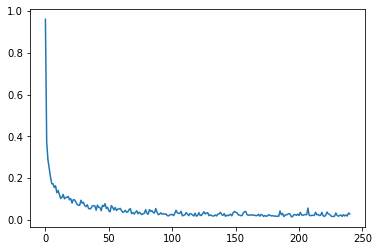

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)